In [1]:
#Importing packages
from transformers import ViTModel, ViTImageProcessor
import torch
from torch.utils.data import DataLoader
import gc
import pandas as pd
import numpy as np
import chromadb

#Import library code
import dataloading
import model_functions
import data_vis

c:\Users\Aneesh\anaconda3\envs\vision_models\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
labels_csv = "camera_data/coronado_hills_binary_10-24-2025.csv"
image_dir = "camera_data/images/"

data = dataloading.get_data(labels_csv=labels_csv, image_dir=image_dir)

In [3]:
train, val, test = dataloading.get_train_val_test(data = data, output_csvs=True)

In [4]:
persist_directory = "embedding_data/" 
client = chromadb.PersistentClient(path=persist_directory)
collection = client.get_or_create_collection(name="10-27-25_model_embeddings")

In [5]:
db_output = collection.get(ids = val['annotation_id'].astype(str).tolist(), include = ['embeddings'])
embeddings = db_output['embeddings']
labels = val['label']

In [6]:
db_df = pd.DataFrame(embeddings)
db_df['ids'] = db_output['ids']
db_df['ids'] = db_df['ids'].astype('int64')

In [7]:
db_df = db_df.merge(val, left_on = 'ids', right_on='annotation_id')

In [8]:
embeddings = db_df.filter(items = range(0, 768))
labels = db_df['label']

In [9]:
reduced_embeddings, labels = model_functions.reduce_pca(embeddings, labels)

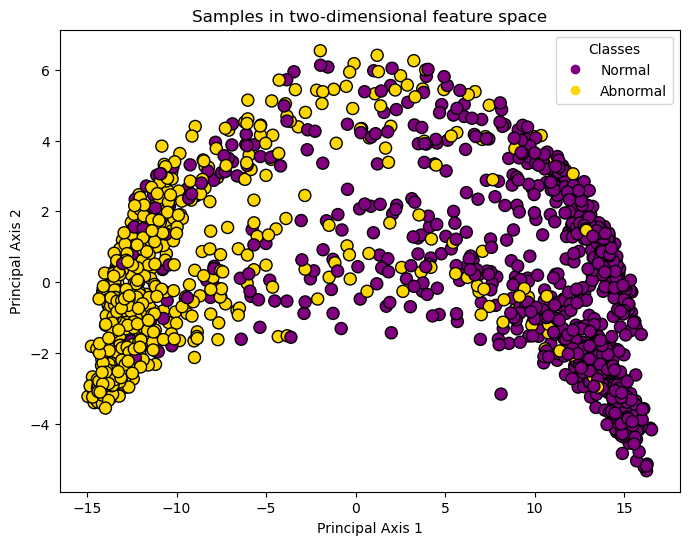

In [10]:
data_vis.plot_data(reduced_embeddings, labels)

Accuracy: 0.8731642189586115


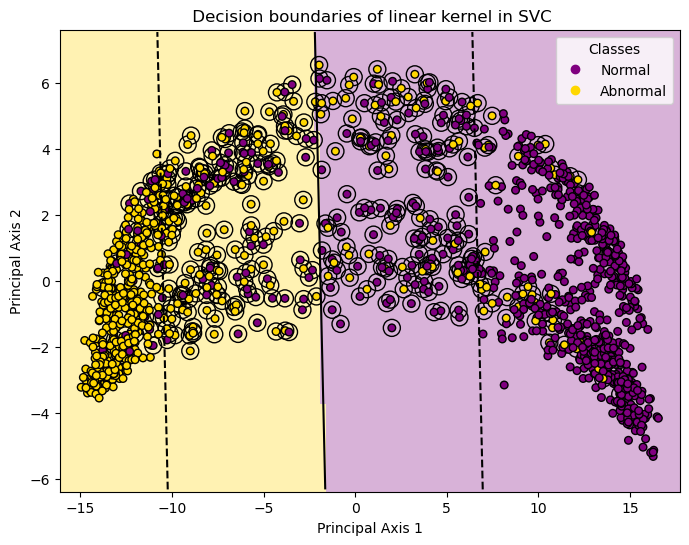

In [11]:
svm_classifier = data_vis.plot_with_decision_boundary("linear", reduced_embeddings, labels)

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(
   svm_classifier, reduced_embeddings, labels)

plt.show()

ValueError: X has 768 features, but SVC is expecting 2 features as input.